This notebook explores what happens to the Energy Function $x^2 + y^2 + z^2$ for different numerical solvers to the Lorenz System. This is checked for three different parameter tripples and for some different initial conditions.

In [4]:
using Plots
using LinearAlgebra
using DifferentialEquations
using Random #could use a seed

In [5]:
include("Solvers.jl")
include("UsefulFunctions.jl")
include("PointGenerators.jl")

PointsOnSphere (generic function with 2 methods)

First we have some help functions for our analysis

In [6]:
function EnergyFunction(x)
    # a very simple energy function
    return x[1]^2 + x[2]^2 + x[3]^2 
end

EnergyFunction (generic function with 1 method)

In [7]:
# Finds the energy at each step of the trajectory for starting position x̄₀
function Energy_of_Path(ẋ::Function, Δt, tim, x̄₀, p)
    tsteps = Int(tim/Δt)
    x̄=x̄₀
    Energy = zeros(tsteps)
    for i=1:tsteps
        x̄= ẋ(p,x̄,Δt)
        Energy[i] = EnergyFunction(x̄)
    end
    return Energy
end

Energy_of_Path (generic function with 1 method)

In [8]:
function Plot_Energies(ẋ,initial_vals, time, Δt,p)
    Energies = zeros(length(initial_vals[1,:]), Int(time/Δt))
    i=1

    plt=plot(
        yaxis= :log10,
        xlim = (0,time),
        title="Semilog plot of the Energy $ẋ \n r=$r and Δt=$Δt",
        xlabel="time",
        ylabel="Energy",
        palette = :seaborn_dark6,
        dpi = 300
    )

    for x̄₀ in eachcol(initial_vals)
        Energies[i,:] = Energy_of_Path(ẋ, Δt, time, x̄₀, p)
        plot!(plt,range(0,stop=time-Δt,step=Δt),Energies[i,:], label=string([round(x̄₀[1]),round(x̄₀[2]),round(x̄₀[3])]))
        i+=1
    end
    display(plt)
end

Plot_Energies (generic function with 1 method)

In [9]:
function Plot_Energies_Fixp(ẋ,initial_vals, time, Δt,p)
    Energies = zeros(length(initial_vals[1,:]), Int(time/Δt))
    i=1

    plt=plot(
        xlim = (0,time),
        title="Plot of the Energy $ẋ \n r=$r and Δt=$Δt",
        xlabel="time",
        ylabel="Energy",
        palette = :seaborn_dark6,
        dpi = 300,
        linewidth = 4
    )

    for x̄₀ in eachcol(initial_vals)
        Energies[i,:] = Energy_of_Path(ẋ, Δt, time, x̄₀, p)
        plot!(plt,range(0,stop=time-Δt,step=Δt),Energies[i,:], label=string([round(x̄₀[1]),round(x̄₀[2]),round(x̄₀[3])]))
        i+=1
    end
    display(plt)
end

Plot_Energies_Fixp (generic function with 1 method)

In [53]:
function Plot_Energies_Preex(ẋ,initial_vals, time, Δt,p)

    Energies = zeros(length(initial_vals[1,:]), Int(time/Δt))
    solutions = [[]]
    i=1
    p=plot(
        #yaxis= :log10,
        title="Plot of the Energy Rodas5 non adaptive \n r=$r and Δt=$Δt",
        xlabel="time",
        ylabel="Energy",
        palette = :seaborn_dark6,
        dpi = 300
    )
    for x̄₀ in eachcol(initial_vals)
        prob = ODEProblem(LorentzSystem,x̄₀,(0.0,time),[θ,μ,β],adaptive=false)
        sol = solve(prob, ẋ, dt=Δt)
        NRG = zeros(length(sol.u[:,1]))
        plot!(p,sol.t,[EnergyFunction(x) for x in sol.u],label=string([round(x̄₀[1]),round(x̄₀[2]),round(x̄₀[3])]))
        solutions = [solutions, sol.t]
        i+=1
    end
    display(p)
end

Plot_Energies_Preex (generic function with 1 method)

Analysis of the energy when $\mu < 1$ and the origin is globally stable

In [ ]:
## parameter values
θ = 10.0; β = 8/3; μ = 1/2
tim = 20
Δt = 0.001

# initial values
nr_of_initial_conditions = 5
r = 250 # From the analysis of global stability, we know that all solvers converge to the origin when r <= 250
initial_vals = PointsOnSphere(nr_of_initial_conditions, r)

In [ ]:
Plot_Energies_Preex(Rodas5(), initial_vals, tim, Δt, [θ,μ,β])
savefig("plots/Rodas5Energy_origin.png")

In [ ]:
#Euler Forward
Plot_Energies(EulerForward, initial_vals, tim, Δt, [θ,μ,β])
savefig("EulerForwardEnergy_origin.png")

In [ ]:
#Runge Kutta 4
Plot_Energies(RK4, initial_vals, tim, Δt, [θ,μ,β])
savefig("RK4Energy_origin.png")

In [ ]:
#DTM
Plot_Energies(DTM, initial_vals, tim, Δt, [θ,μ,β])
savefig("DTMEnergy_origin.png")

In [ ]:
Plot_Energies(EulerCromer, initial_vals, tim, Δt, [θ,μ,β])
savefig("EulerCromerEnergy_origin.png")

Analysis of the energy for when there exists two additional fixpoints to the origin

In [ ]:
## parameter values
θ = 10.0; β = 8/3; μ = 23.5
tim = 100
Δt = 0.001

# Fixed points
x̄_fix1 = [sqrt(8*22.5/3);
          sqrt(8*22.5/3);
          22.5]

x̄_fix2 = [-sqrt(8*22.5/3);
          -sqrt(8*22.5/3);
          22.5]

In [ ]:
# Euler Forward
# Basically didn't want to converge for Δt=0.001
Δt = 0.0001
nr_of_initial_conditions = 1
r = 1/100 # the fix points are not globally stable but stable
initial_vals = PointsOnSphere(nr_of_initial_conditions, r)
initial_vals1 = initial_vals .+ x̄_fix1
Plot_Energies_Fixp(EulerForward, [8.0; 8.0; 23.0], 40, Δt, [θ,μ,β])
savefig("EulerForwardEnergy_fix1.png")

In [ ]:
print(initial_vals1)

In [ ]:
nr_of_initial_conditions = 2
Δt = 0.001
tim=40
r =2 # the fix points are not globally stable but stable
initial_vals = PointsOnSphere(nr_of_initial_conditions, r)
initial_vals1 = initial_vals .+ x̄_fix1
initial_vals2 = initial_vals .+ x̄_fix2

In [ ]:
#Runge Kutta 4
Plot_Energies_Fixp(RK4, [8.0; 8.0; 23.0], 40, Δt, [θ,μ,β])
savefig("RK4_fixp.png")

In [ ]:
Plot_Energies_Preex(RadauIIA5(), [8.0; 8.0; 23.0], 40, Δt, [θ,μ,β])
savefig("RadauIIA5Energy_fix1_nonadaptive.png")

In [ ]:
# DTM
Plot_Energies_Fixp(DTM, [8.0; 8.0; 23.0], 40, Δt, [θ,μ,β])
savefig("DTMEnergy_fix1.png")

In [ ]:
print(Δt)

In [ ]:
# Euler Cromer
Plot_Energies_Fixp(EulerCromer, [8.0; 8.0; 23.0], 40, Δt, [θ,μ,β])
savefig("EulerCromerEnergy_fix1.png")

Analysis of the energy for the traditional chaotic Lorenz parameters $\theta=10$, $\beta = \frac{8}{3}$, $\mu = 28$

In [ ]:
## parameter values
θ = 10.0; β = 8/3; μ = 28
tim = 50
Δt = 0.001

# initial values
nr_of_initial_conditions = 5
r = 250 # From the analysis of global stability, we know that all solvers converge to the origin when r <= 250
intitial_vals = PointsOnSphere(nr_of_initial_conditions, r, x̄_fix1')

In [ ]:
Plot_Energies_Preex(Rodas5(), intitial_vals, tim, Δt, [θ,μ,β])
savefig("Rodas5Energy_chaos.png")

In [ ]:
#Euler Forward
Plot_Energies(EulerForward, initial_vals, tim, Δt, [θ,μ,β])
savefig("EulerForwardEnergy_chaos.png")

In [ ]:
#Runge Kutta 4
Plot_Energies(RK4, initial_vals, tim, Δt, [θ,μ,β])
savefig("RK4Energy_chaos.png")

In [ ]:
#DTM
Plot_Energies(DTM, initial_vals, tim, Δt, [θ,μ,β])
savefig("DTMEnergy_chaos.png")

In [ ]:
# Euler Cromer
Plot_Energies(EulerCromer, initial_vals, tim, Δt, [θ,μ,β])
savefig("EulerCromerEnergy_chaos.png")

Hopefully the energy won't change for these values

In [38]:
## parameter values
θ = -10.0; β = 1; μ = 10
tim = 50
Δt = 0.001

# initial values
nr_of_initial_conditions = 1
r = 250 # From the analysis of global stability, we know that all solvers converge to the origin when r <= 250
x̄₀ = [10.0; 30.0; 10.0]
#intitial_vals = PointsOnSphere(nr_of_initial_conditions, r, x̄_fix1')

3-element Vector{Float64}:
 10.0
 30.0
 10.0

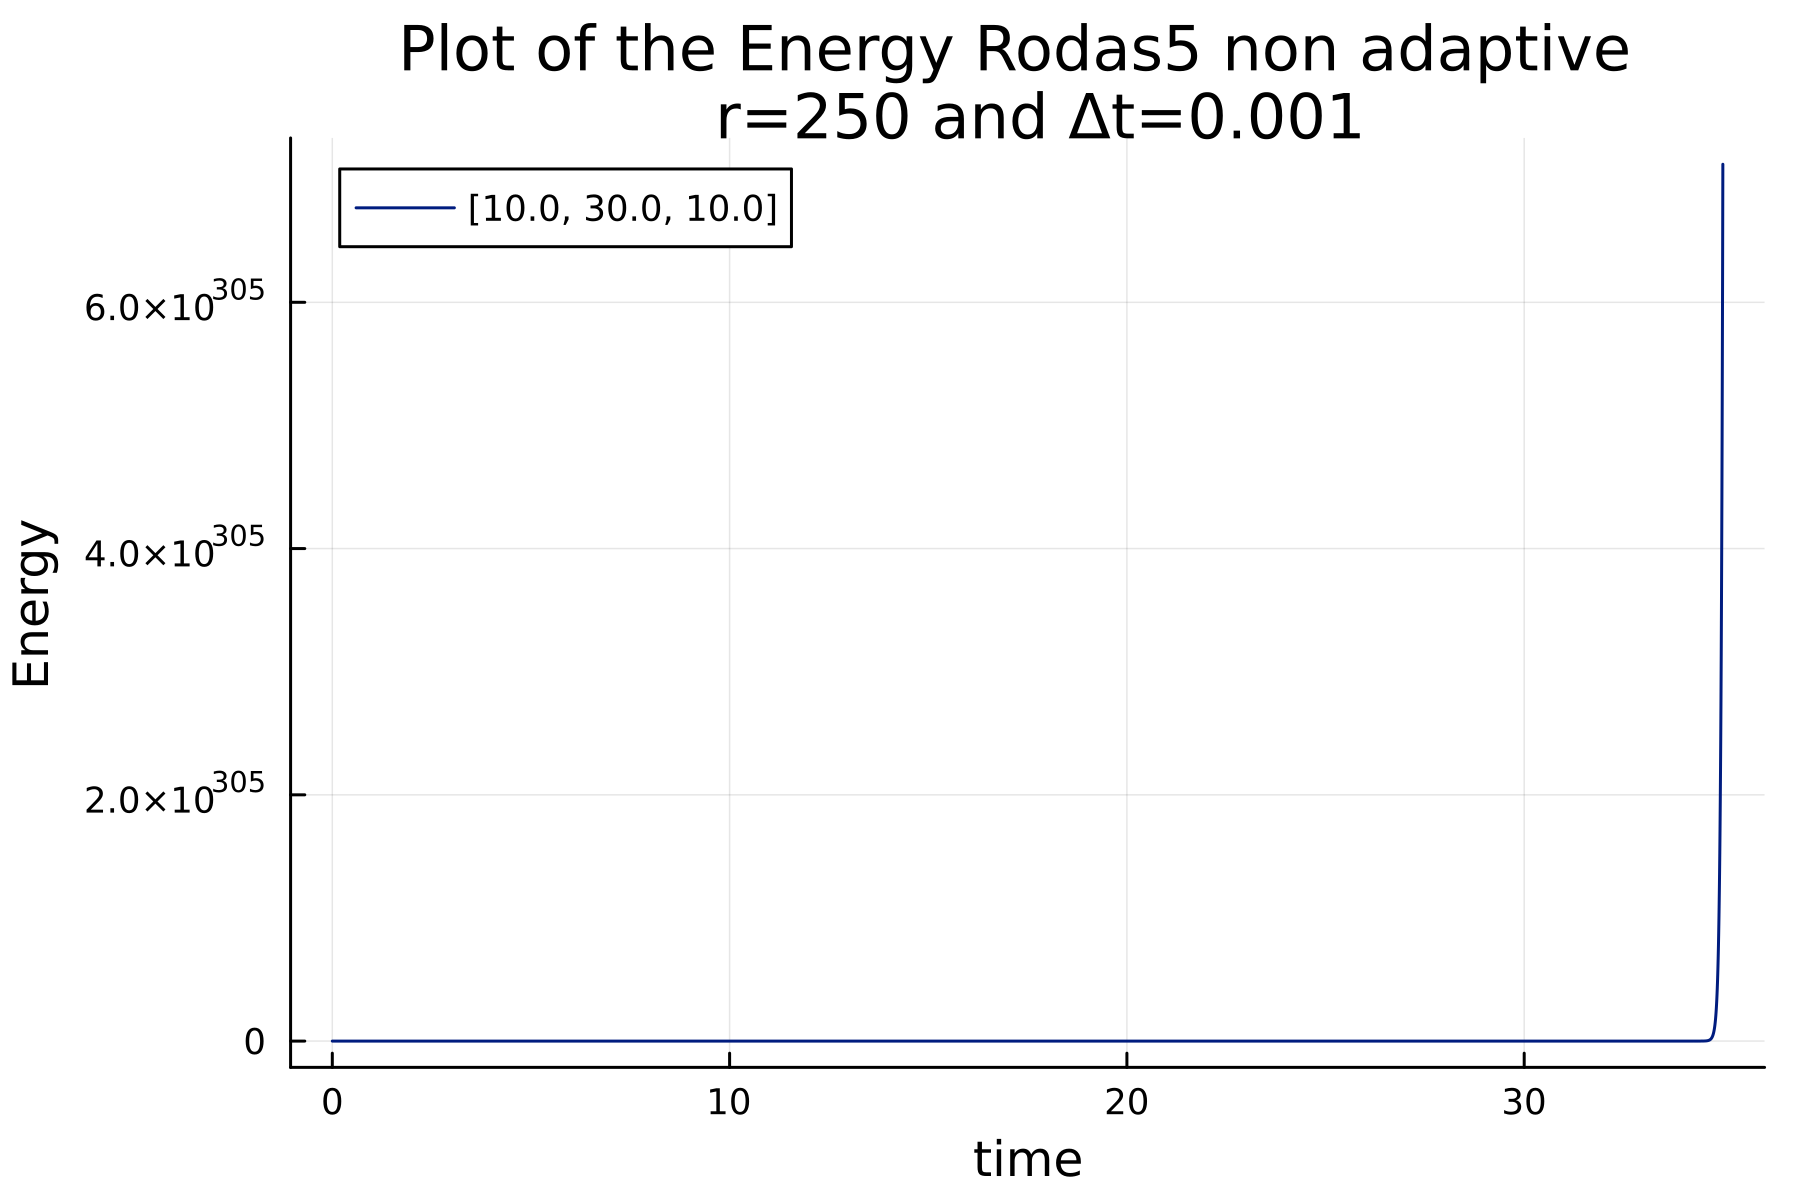

"/Users/00eila01/01_Arbete/UTBILDNING/KEXET/Numerical-Solutions-and-Parameter-Sensitivity-of-the-Lorentz-System-Degree-Project-in-Technology/Numerical-Solvers/plots/Rodas5ConstantEnergy_chaos_nonadaptive.png"

In [55]:
Plot_Energies_Preex(Rodas5(), x̄₀, 35, Δt, [θ,μ,β])
savefig("plots/Rodas5ConstantEnergy_chaos_nonadaptive.png")

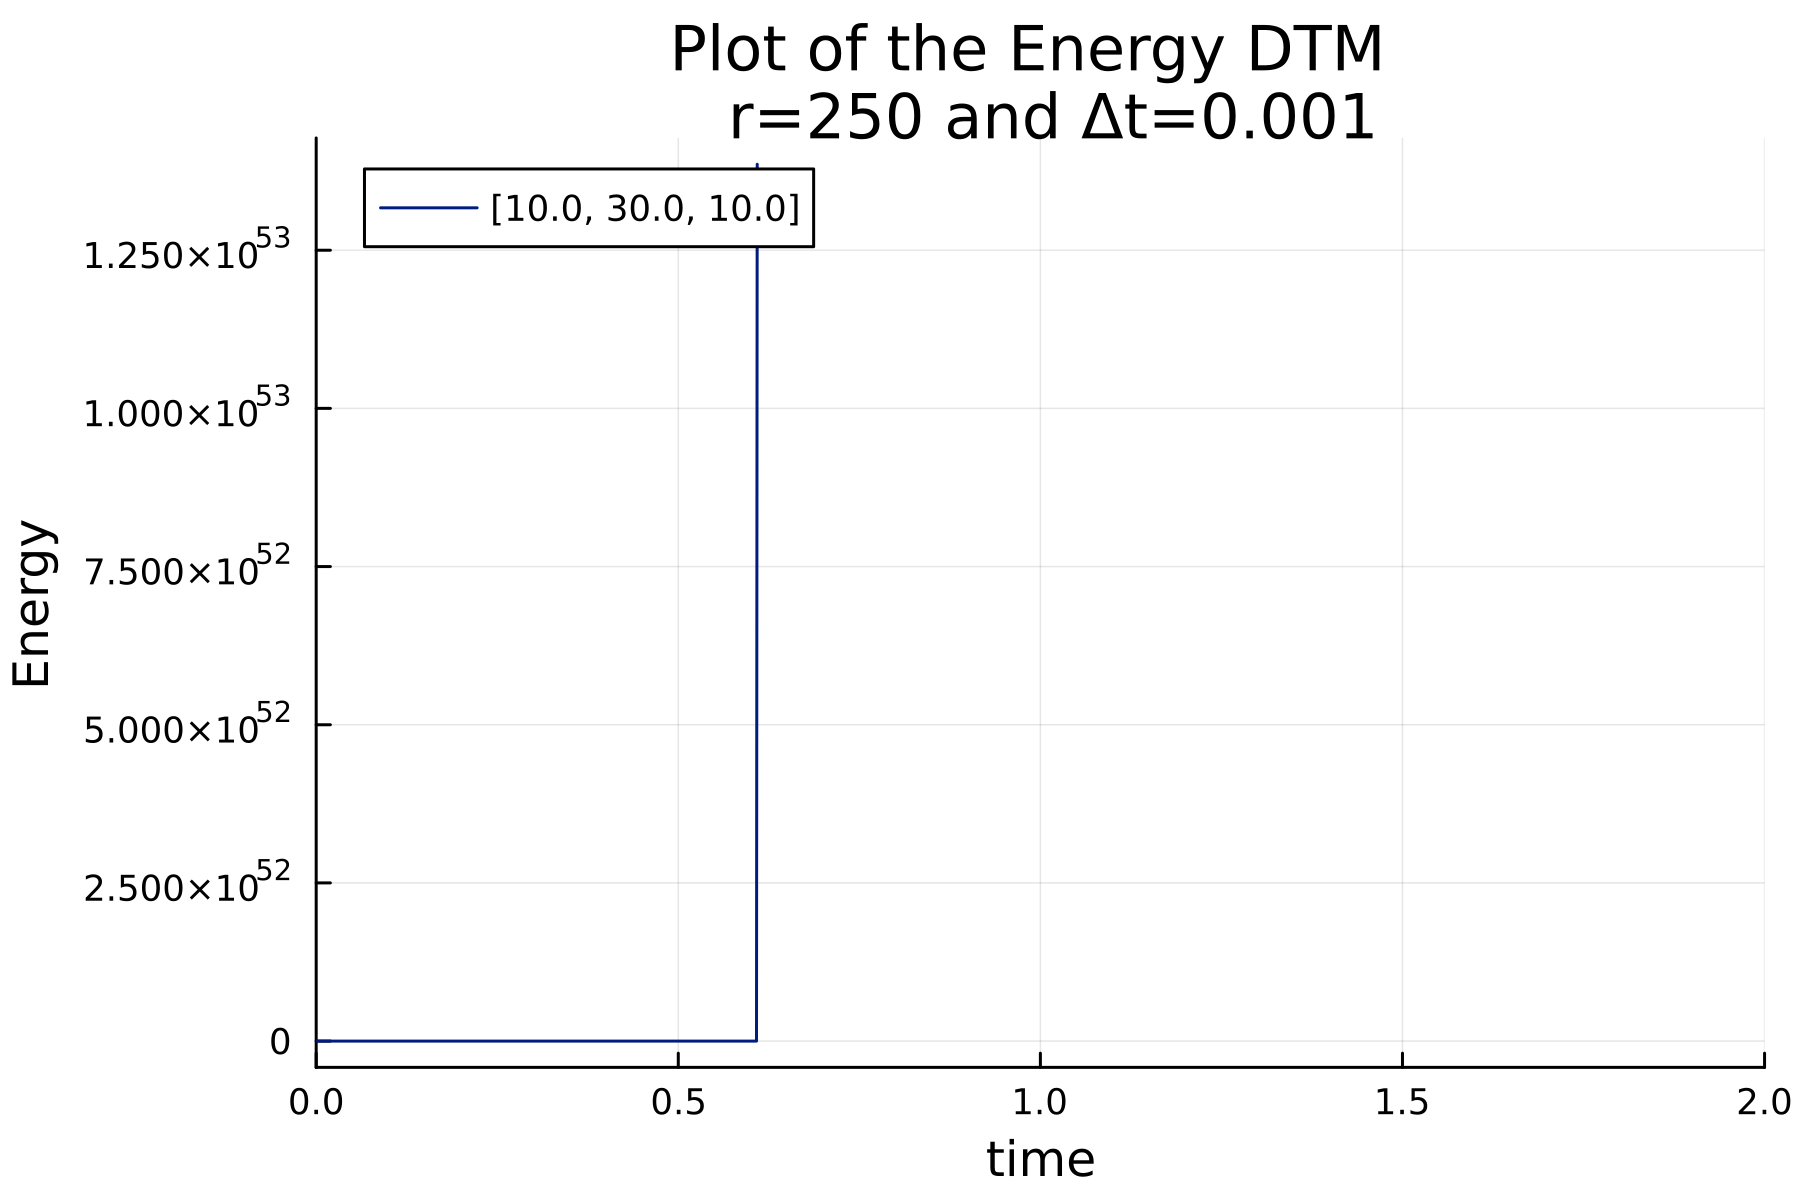

"/Users/00eila01/01_Arbete/UTBILDNING/KEXET/Numerical-Solutions-and-Parameter-Sensitivity-of-the-Lorentz-System-Degree-Project-in-Technology/Numerical-Solvers/plots/DTMConstantEnergy_chaos.png"

In [66]:
#Runge Kutta 4
Plot_Energies_Fixp(DTM, x̄₀, 2, Δt, [θ,μ,β])
savefig("plots/DTMConstantEnergy_chaos.png")